# Setup

In [7]:
LOG_PLOT = False
NDAYS=50

In [2]:
%matplotlib notebook
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
import os
from helper import *
from datetime import datetime
from ecdc import ECDC

## ECDC Data

In [3]:
ecdc = ECDC()
df = ecdc.df
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

## DF Subsets

In [4]:
EU = df[df.continentExp=='Europe'].groupby('dateRep', as_index=False).agg({'cases': sum})
AMERICA = df[(df.continentExp=='America')]


<IPython.core.display.Javascript object>


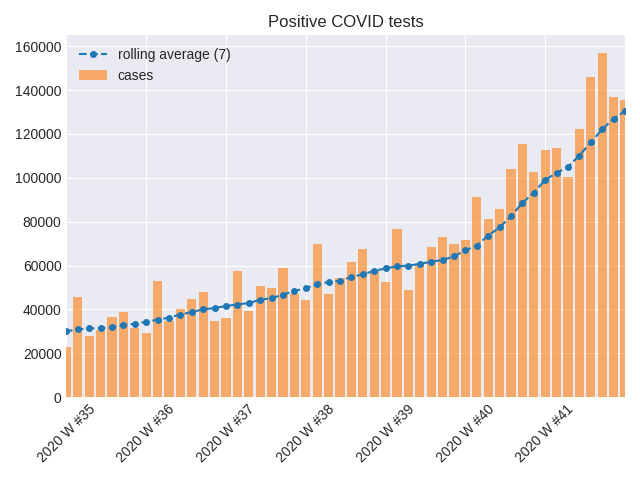

<AxesSubplot:title={'center':'Positive COVID tests'}>

In [8]:
ecdc.plot_selection(EU, ndays=NDAYS, roll_days=7)

# Overview

## Austria, USA, India, ...

<IPython.core.display.Javascript object>


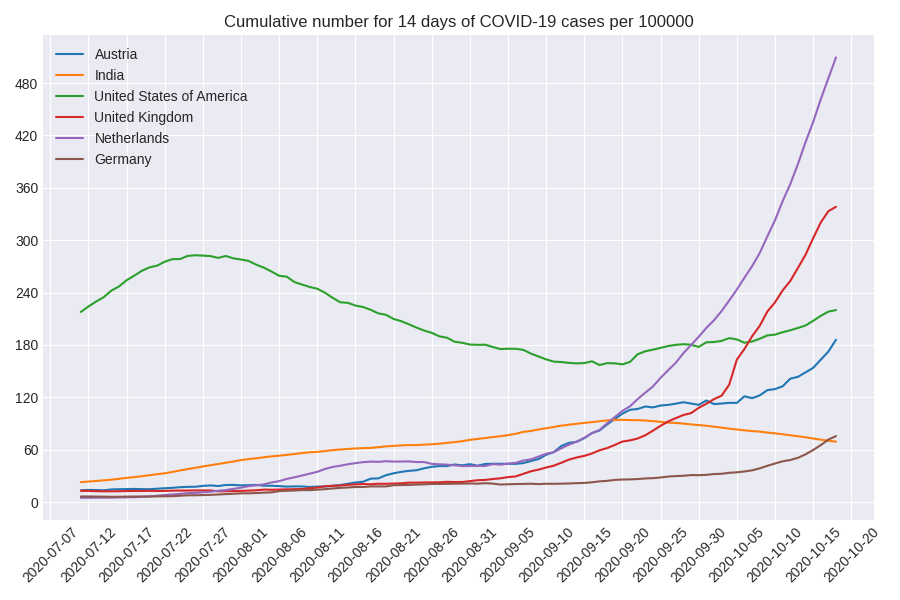

cases                                     \
                           rolling_avg                        last_5_days   
countriesAndTerritories                                                     
India                     62963.571429  63509, 67708, 63371, 62212, 61871   
United_States_of_America  55400.714286  52517, 59386, 63785, 70256, 56611   
United_Kingdom            16369.142857  17232, 19724, 18978, 15635, 16171   
Netherlands                7387.571429       7368, 7271, 7779, 7978, 8105   
Germany                    5587.142857       5132, 6638, 7334, 7830, 5587   
Austria                    1401.428571       1171, 1606, 1396, 1691, 2040   

                                 deaths                              \
                            max     sum last_7_days_sum rolling_avg   
countriesAndTerritories                                               
India                     97894  114031            5697  813.857143   
United_States_of_America  78427  219289            4912  701.714286   
United_Kingdom            22961   43579             819  117.000000   
Netherlands                8105    6728             170   24.285714   
Germany                    7830    9777             162   23.142857   
Austria                    2040     907              49    7.000000   

                                                          \
                                       last_5_days   max   
countriesAndTerritories                                    
India                     730, 680, 895, 837, 1033  2003   
United_States_of_America   817, 970, 828, 899, 690  4928   
United_Kingdom             143, 137, 138, 136, 150  1224   
Netherlands                     35, 32, 29, 16, 29   234   
Germany                         43, 33, 24, 33, 10   315   
Austria                             10, 9, 6, 7, 6    31   

                         Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  \
                                                                             latest   
countriesAndTerritories                                                               
India                                                             69.171964           
United_States_of_America                                         219.959030           
United_Kingdom                                                   338.215705           
Netherlands                                                      509.461692           
Germany                                                           75.569254           
Austria                                                          185.985083           

                                      
                                 max  
countriesAndTerritories               
India                      94.173835  
United_States_of_America  282.723242  
United_Kingdom            338.215705  
Netherlands               509.461692  
Germany                    86.358323  
Austria                   185.985083

In [9]:
# countries = ['AT', 'IN', 'US', 'UK', 'DE', 'NL', 'FR',  'IT', 'ES','EL' ]
countries = ('AT', 'IN', 'US', 'UK', 'NL', 'DE')
SELECTION =  df[df.geoId.isin(countries)]

ecdc.plot_comparison(countries, log=False, ndays=100)
ecdc.overview(SELECTION)

## Sweden and the world

<IPython.core.display.Javascript object>


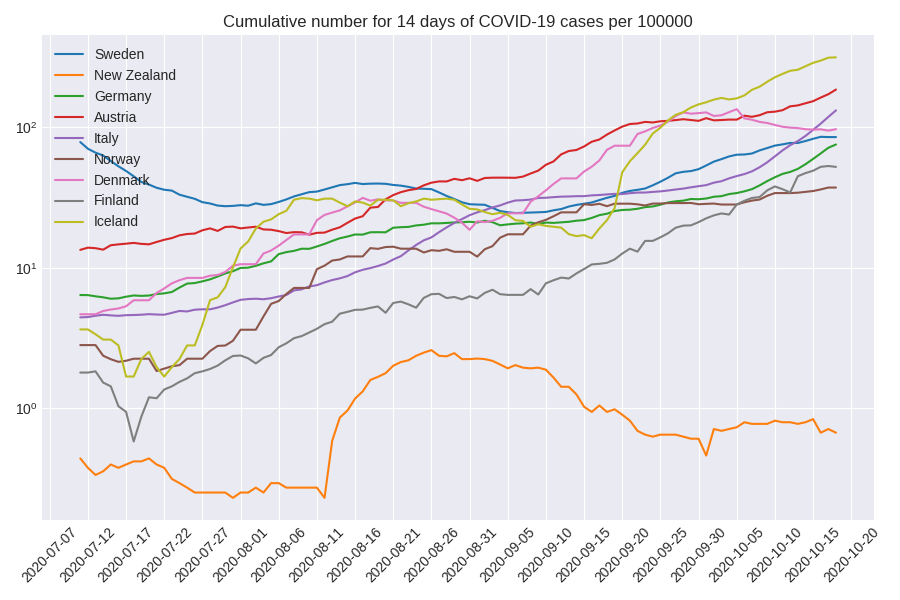

<AxesSubplot:title={'center':'Cumulative number for 14 days of COVID-19 cases per 100000'}>

In [10]:
countries = ('SE', 'NZ','DE','AT','IT','NO','DK','FI','IS')
ecdc.plot_comparison(countries, log=True, ndays=100)


### World

In [11]:
ecdc.overview(df).head(5)

cases                                     \
                           rolling_avg                        last_5_days   
countriesAndTerritories                                                     
India                     62963.571429  63509, 67708, 63371, 62212, 61871   
United_States_of_America  55400.714286  52517, 59386, 63785, 70256, 56611   
France                    21189.142857  12993, 22591, 30621, 25086, 32427   
Brazil                    20246.428571  10220, 27235, 28523, 30914, 24062   
United_Kingdom            16369.142857  17232, 19724, 18978, 15635, 16171   

                                 deaths                              \
                            max     sum last_7_days_sum rolling_avg   
countriesAndTerritories                                               
India                     97894  114031            5697  813.857143   
United_States_of_America  78427  219289            4912  701.714286   
France                    32427   33392             708  101.142857   
Brazil                    69074  153675            3477  496.714286   
United_Kingdom            22961   43579             819  117.000000   

                                                          \
                                       last_5_days   max   
countriesAndTerritories                                    
India                     730, 680, 895, 837, 1033  2003   
United_States_of_America   817, 970, 828, 899, 690  4928   
France                       108, 104, 88, 178, 89  2004   
Brazil                     309, 749, 713, 754, 461  1595   
United_Kingdom             143, 137, 138, 136, 150  1224   

                         Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  \
                                                                             latest   
countriesAndTerritories                                                               
India                                                             69.171964           
United_States_of_America                                         219.959030           
France                                                           388.838666           
Brazil                                                           150.452368           
United_Kingdom                                                   338.215705           

                                      
                                 max  
countriesAndTerritories               
India                      94.173835  
United_States_of_America  282.723242  
France                    388.838666  
Brazil                    304.320523  
United_Kingdom            338.215705

# Austria
Compare ECDC data with Gesundheitsminesterium Data

## Plots

<IPython.core.display.Javascript object>


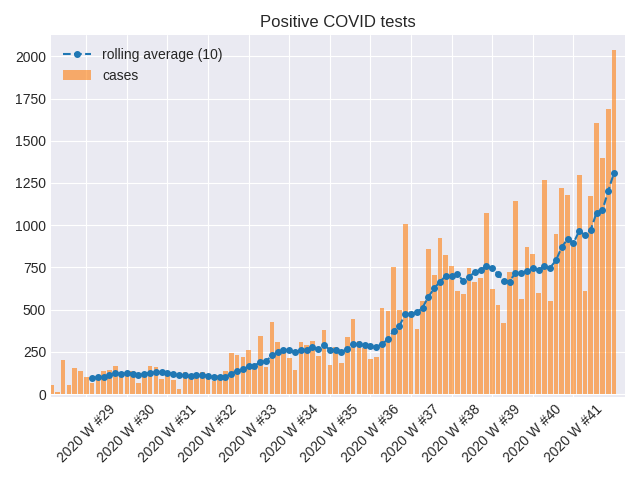

In [12]:
ecdc.plot_country('AT', log=LOG_PLOT, ndays=100, roll_days=10);

# India

<IPython.core.display.Javascript object>


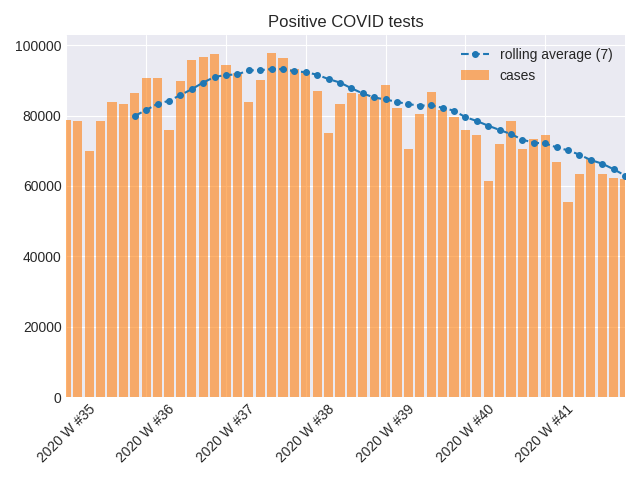

In [14]:
ecdc.plot_country('IN', log=LOG_PLOT,ndays=NDAYS, roll_days=7);

# USA

<IPython.core.display.Javascript object>


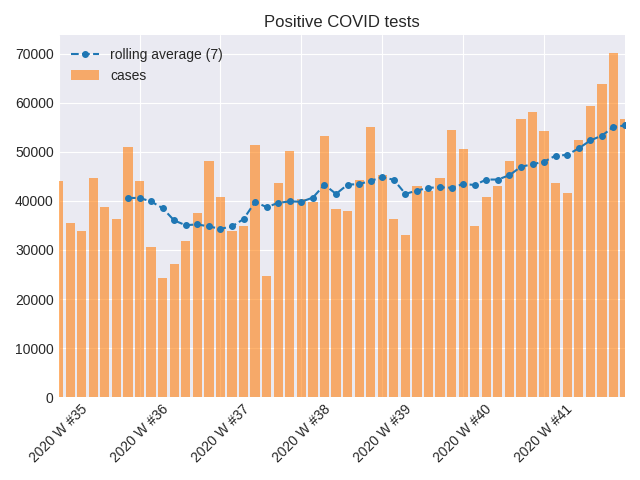

In [15]:
ecdc.plot_country('US', log=LOG_PLOT,ndays=NDAYS, roll_days=7);


# Germany

<IPython.core.display.Javascript object>


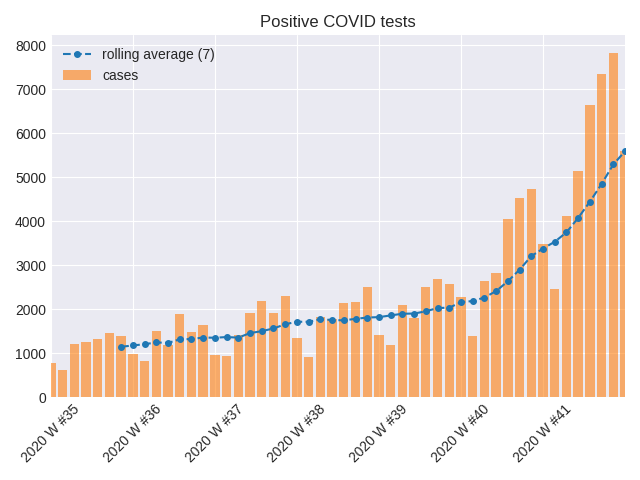

In [16]:
ecdc.plot_country('DE', log=LOG_PLOT,ndays=NDAYS, roll_days=7);

## UK

<IPython.core.display.Javascript object>


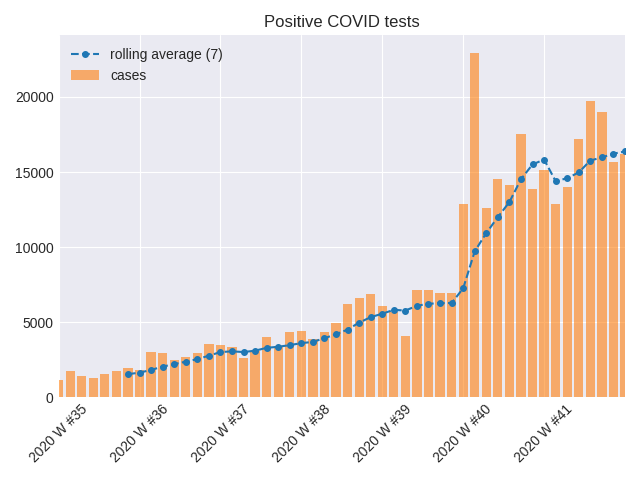

In [17]:
ecdc.plot_country('UK', log=LOG_PLOT,ndays=NDAYS,roll_days=7);

# Commit and Push

In [14]:
%cd Documents/code/covid19/
now = datetime.now()
commit_message = "Last run on " + now.strftime('%Y-%m-%d %H:%M')
commit_message
! echo $commit_message > commit_message.txt
! git add .
! git commit -F commit_message.txt
! git push


[Errno 2] No such file or directory: 'Documents/code/covid19/'
/home/gythaogg/Documents/code/covid19/notebooks


NameError: name 'datetime' is not defined

In [41]:
! git push --set-upstream origin feature/angular


Branch 'feature/angular' set up to track remote branch 'feature/angular' from 'origin'.
Everything up-to-date
